<a href="https://colab.research.google.com/github/tunatuna123/linear_regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#초기 설정입니다. 상관 말아주세요
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings(action='ignore') 
mpl.rc('axes', unicode_minus=False)

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name() 
plt.rc('font', family=font_name)
fm._rebuild()

#<**선형회귀분석**(Linear Regression model)>

#Ⅰ. 개념

##1.**선형회귀분석**이란?

-회귀분석은 독립변수 $x$에 대응하는 종속변수 $y$와 가장 비슷한 값 $ŷ$을 출력하는 함수 $f(x)$를 찾는 과정이다. 또한, 이미 $y$값을 알고 있기에 지도학습으로도 분류된다.

그리고 $f(x)$가 

> $f(x) = ŷ ≈ y$

과 같이 선형함수(일차함수)의 꼴을 만족할때, 해당 함수를 **선형회귀모형**이라고 하며 선형회귀모형을 이용한 회귀분석을 **선형회귀분석**이라고 한다. 

##2.**선형회귀모형**

독립변수를 $x$, 가중치 벡터를  $w$, 데이터의 차원을 $D$라고 하면 선형회귀모형은
>$ŷ = w_0 + w_1x_1 + w_2x_2 + … + w_Dx_D$

로 나타낼 수 있다. 이는 전치 행렬을 통해


> $f(x) = w_0 + x^Tw$

로 간결하게 표현할 수 있다. 또한, 위의 식에서 가중치 벡터는 $f(x)$의 계수로서 선형회귀모형의 파라미터(parameter, 매개변수)라고 한다. 


#Ⅱ. 예시

##Q. $X : [1,2,3]$, $Y:[3,5,7]$ 이다. $X=4$일때 $Y$의 값은?

---


일반적으로, 해당 경우 바로 $f(x) = 2x+1$이라는 것을 알 수 있을 것이다. 그러나 위의 문제는 설명을 위한 간단한 수일 뿐, 실제로 다루는 데이터는 훨씬 복잡하고 난해하다. 일단 예시에서는 정답이 $f(x) = 2x+1$라는 것을 참고하면서 읽어보자.

---

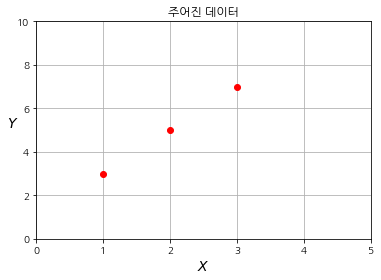

In [ ]:
X_given = np.array([1,2,3])
Y_true = np.array([3,5,7])
font = {'family': 'serif',
            'weight': 'bold',
            'size': 14
            }
def given_data():
    plt.plot(X_given, Y_true, 'ro')
    plt.axis([0, 5, 0, 10])
    plt.xlabel(r'$X$', fontdict=font)
    plt.ylabel(r'$Y$', fontdict=font, rotation=0)
    plt.grid(True)
    plt.savefig("given data.jpg", dpi=600)

plt.title('주어진 데이터')
plt.show(given_data())

In [ ]:
from google.colab import files
#files.download('given data.jpg') 

##1.가정함수

우선, 선형회귀분석은 주어진 데이터로부터 선형회귀모형을 만들어낸 후, 새로운 $x$값에 대해 $y$값을 **예측**하기 때문에 제일 먼저 **'가정'**을 해야한다. 그리고 가정을 위해서 만드는 함수를 **가정함수($H$)**라고 하며 

> $H(W,x) = Wx+b$

로 나타낸다. 따라서 현재 목표는 $W=2, b=1$에 가장 근접하도록 학습을 시켜야 하는 것이다.

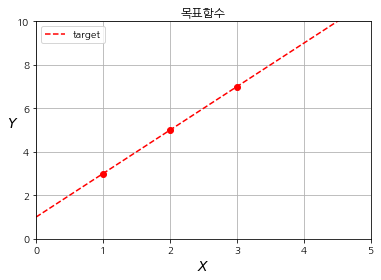

In [ ]:
def target_function():
    x = np.arange(0, 6)
    y = 2*x + 1  
    plt.plot(x, y, label='target', color='r', linestyle="--")
    plt.legend()

def hypothesis(X,W,b):
    return W*X+b

plt.title('목표함수')
plt.show(given_data(), target_function())

###가설 초기화
 가정함수는 수정을 통해 목표함수로 다가가기 위해서 **가설 초기화**라는 단계를 거친다. 가정 초기화 단계에서는 $W$와 $b$에 각각 임의의 숫자를 대입한다. 예시에서는 $W$에 $1$을, $b$에 $0$을 대입해보겠다(원래는 난수다).


> $H(1,0) = x$

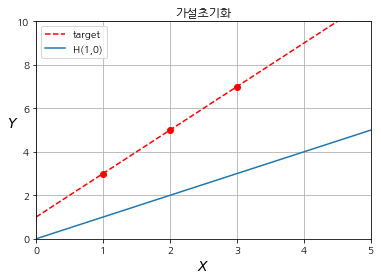

In [ ]:
given_data()
target_function()
x = np.arange(0, 7)
plt.plot(x, hypothesis(x,1,0), label='H(1,0)')
plt.legend()
plt.title('가설초기화')
plt.savefig("H.jpg", dpi=600)
plt.show()

In [ ]:
#files.download('H.jpg') 

##2.비용(Cost)

가설 초기화를 통해 임의의 가정함수가 만들어진 후에는 반복적인 연산을 통해 목표 함수와 유사해지도록 만들어야한다. 이를 위해서는 가정함수가 목표함수에 비해 **'얼마나 잘못되었는가'**를 알아야한다. 그리고 선형회귀에서는 이러한 오차를 **비용**이라고 칭한다. 

###평균제곱오차(MSE, Mean Squared Error)
비용을 계산하는 알고리즘은 다양하지만, 예시에서는 가장 널리 사용되고 직관적으로 이해할 수 있는 **평균제곱오차** 알고리즘을 사용하겠다.

MSE는 실제값과 예측값의 차이를 제곱해 평균화하는 방법으로 오차를 계산해낸다.


> $Cost(W,b) = {1 \over m} \sum_{i=1}^m(y_i-ŷ_i)^2$ 

따라서 다음을 numpy를 통해 파이썬 코드로 구현하면,
```py
np.square(np.subtract(Y_true,Y_pred)).mean() 
```
로 나타낼 수 있다.

따라서 $Cost(1,0)$의 비용을 계산해보면,

In [ ]:
def MSE(X,W,b):
    return np.square(np.subtract(Y_true,hypothesis(X,W,b))).mean() 

print('비용 : ', MSE(X_given,1,0))

비용 :  9.666666666666666


비용이 약 9.6이라는 것을 알 수 있다.

그러나 여기서 몇가지 의문점이 들 수도 있는데 

*   왜 제곱을 해주는가?
*   왜 절댓값이 아닌, 제곱을 사용하는가?
*   왜 평균을 사용하는건가?

 먼저, 제곱을 해주는 이유는 오차가 항상 같은 부호를 가지지 않기 때문이다.

> $e = y-ŷ$

로 표기되는 잔차 벡터(residual vector) $e$가 원소로 [1, -3, 2, 4, -4]를 가진다면, 오차의 합은 1 + (-3) + 2 + 4 + (-4)=0 이 되어 무의미한 판별 대상이 된다. 따라서 항상 양수를 가지게 해주기 위해 제곱을 사용하는 것이다.

둘째로, 양수의 값이 필요하다면 왜 절댓값이 아닌 제곱을 사용하는지는 비용의 크기와 컴퓨터의 작동 원리와 관계가 있다.

오차를 제곱을 해준다면 오차에 절댓값을 씌웠을 때보다 값이 커지며, 오차가 클수록 그 제곱값은 기하급수적으로 커지게 된다. 이는 가설이 잘못되었을 때, 그 오차가 클수록 더욱 큰 페널티를 준다는 뜻이다. 또한, 절댓값을 사용하면 컴퓨터 내부적으로 조건문이 필요하게 되어 계산 속도가 느려져 제곱을 이용한다.

마지막으로, 평균값을 내어주는 이유는 오차제곱합(SSE)만으로는 실제 오차가 커서 값이 커지는 것인지 데이터의 양이 많아서 값이 커지는 것인지를 구분할 수 없게 되기 때문이다. 따라서 방대한 양의 데이터를 다룰 때는 평균을 통해 데이터 간의 오차를 계산하주게 된다.

이제 여기까지의 설명을 읽었으면, 선형회귀분석을 위해 가장 중요한 것은 비용함수의 값을 최소화 하는 것임을 알 수 있다. 따라서 정교한 분석을 위해서는 $min Cost(W,b)$의 값이 최소가 되어야한다. 그리고 $min Cost(W,b)$를 구하는 방법은 **경사하강법**을 통해 구할 수 있다.

 

---
---




#<경사하강법(Gradient Descent)>


#Ⅰ. 개념

##1.**경사하강법**이란?
경사하강법은 함수의 **기울기(=gradient)**를 이용해서 함수의 최소값 일 때의 x값을 찾기 위한 방법이다. 이 때문에 손실 함수의 최솟값을 찾기 위해서도 많이 쓰인다. 실제값과 예측값의 차이를 알려주는 손실 함수의 최소점은 결국 예측값이 실제값 사이가 굉장히 유사해지는 지점을 뜻하기 때문이다.

기울기가 양수인 경우는 x 값이 증가할수록 함수 값도 증가하고, 반대로 음수인 경우에는 x 값이 증가할수록 함수 값이 감소한다. 그리고 기울기 값이 크다, 기울기가 가파르다는 것은 최소값으로부터 거리가 멀다는 뜻이다.

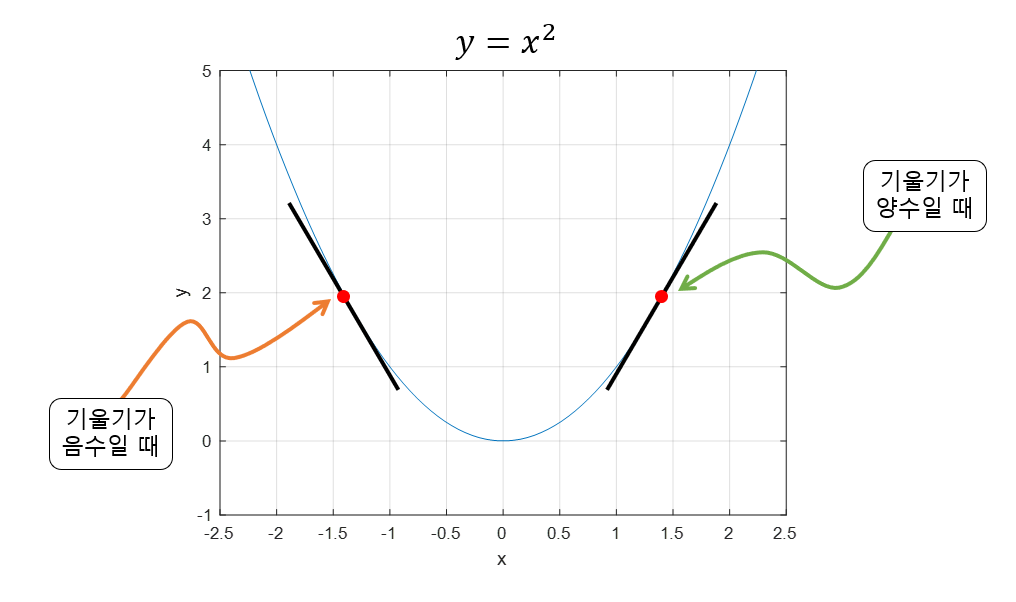

이 점을 이용해서 **기울기가 양수**라면 **음의 방향**으로 $x$를 옮기면 되고, **기울기가 음수**라면 **양의 방향**으로 $x$를 옮기면 된다.

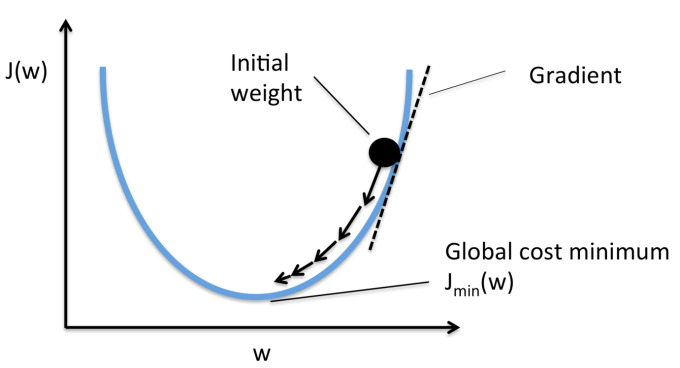

##2.**최솟값(minimum)**
강사하강법을 통해 찾고자 하는 것은 손실함수의 최솟값(global minimum 또는 global optimum)이다. 그러나 이는 함수의 극대와 극소와는 다른 것인데, 극대와 극소는 어떤 열린구간에서 정의되는 반면, 우리가 찾고자 하는 최솟값은 실수 전체 범위에서의 최솟값이다. 따라서 경사하강법을 사용할 때 찾는 점은 global minimum이지, local minimum이 아니다. 그러나, local minimum에서도 기울기는 0이기 때문에 local minimum에 빠져서 잘못된 함수가 계산될 수도 있다. 또는 고차원의 데이터에서는 안장점(saddle point)에서 계산에 문제가 생길 수도 있다. 

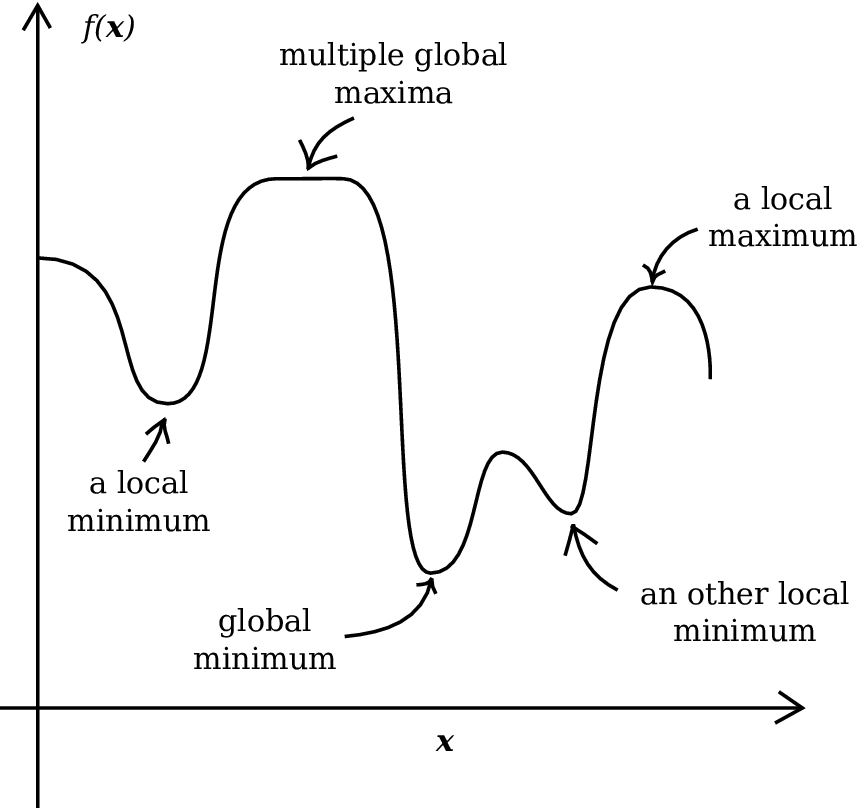

⇑ local minimum과 global minimum

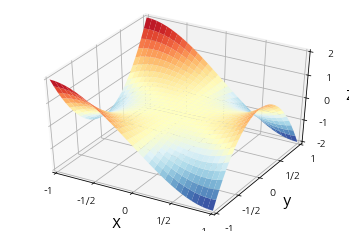

In [ ]:
def plot_surface(x, y, z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r"):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': -2, 'vmax': 2}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-2, 2)
    
    plt.xticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    plt.yticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    ax.set_zticks([-2, -1, 0, 1, 2])
    ax.set_zticklabels(["-2", "-1", "0", "1", "2"])
    
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax;

def monkey_saddle(x,y):
    return x**3 - 3*x*y**2

def grad_monkey_saddle(params):
    x=params[0]
    y=params[1]
    grad_x= 3*x**2-3*y**2
    grad_y= -6*x*y
    return [grad_x,grad_y]

x, y = np.mgrid[-1:1:31j, -1:1:31j]
fig1,ax1=plot_surface(x,y,monkey_saddle(x,y))
plt.savefig("H.jpg", dpi=600)

⇑ 경사하강법의 골칫덩어리 Monkey saddle($z = x^3-3xy^2$)

안장점에서도 기울기는 0에 가까워지며 되며 그 면적도 상당히 넓기 때문에 해당 지점 부근에 안착할 가능성이 꽤나 높아진다. 또한, 벗어난다고 하더라도 미분계수에 비례해 이동하는 경사하강법은 안장점 주변에서 아주 더디게 계산이 이루어진다는 문제점도 있다.


###Momentum(관성)
이러한 문제들을 해결하기 위해 Momentum을 도입한다. 우리말로는 '관성' 정도에 해당한다고 보면 된다. 하강에 속도를 부여하고 관성을 통해 최솟점을 찾는 것이다.
경사하강법을 면을 타고 내려가는 공에 비유하면, 공이 점점 내려가면서 속도가 붙어 local minimum이나 saddle point에 걸리더라도 velocity로 그 영역을 탈출하는 것이다.

##3.**손실함수(Loss function)**
가정함수 $H$의 $ŷ$이 실제 $y$값에 비해 얼마나 잘 예측했는지 판단하는 함수이다. 비용함수와 혼돈할 수도 있는데, 실제로 손실함수인 동시에 비용함수인 함수들도 있으며, 둘의 구분이 애매하다. 


그러나 차이점을 들자면, **비용함수**는 **최적화 문제**에 쓰이고 **손실함수**는 **파라미터 측정**에 더 많이 쓰인다는 차이가 있다.


대표적인 손실함수로는 다음과 같은 함수가 있다.


*  SE(Squared Error, 제곱 오차) : $(y-ŷ)^2$

*  AE(Absolute Error, 절대 오차) : $|y-ŷ|$ 
*  log loss : $y⋅log(ŷ)+(1-y)⋅log(1-ŷ)$

#Ⅱ. 예시
경사하강법의 예시는 선형회귀분석에서 이어진다.


##1.최적화(Optimization)

앞서 본 것과 같이 적절한 학습을 위해선 손실함수의 값이 최소가 되어야한다. 이를 위해서는 손실함수의 값을 가능한한 작게 만들어주는 매개변수가 필요하고, 이러한 문제를 푸는 것을 최적화라고 한다.

위의 예시에서 보았던 
$minCost(W,b)$의 식을 살펴보면, 
최솟값를 구하기 위해서  
$min\sum_{i=1}^m(ŷ_i-y_i)^2$가 필요하다는 것을 알 수 있다. 
이를 조금만 더 풀어서 보면,

> $Cost(W,b) = {1 \over m} \sum_{i=1}^m(ŷ_i-y_i)^2$

> $Cost(W,b) = {1 \over m} \sum_{i=1}^m(Wx_i+b-y_i)^2$

> $minCost(W,b) \propto min \sum_{i=1}^m(Wx_i+b-y_i)^2$

임을 알 수 있다. 그런데 이때 $x$와 $y$가 상수라는 점을 생각하고 보면, 최솟값을 만들기 위해 영향을 주는 변수는 $W$와 $b$뿐이다. 따라서 손실함수는 $Cost-W$ 좌표평면 위에서는 $W$의 제곱값에 의해 결정되는 이차함수라고 보아도 무방하다.

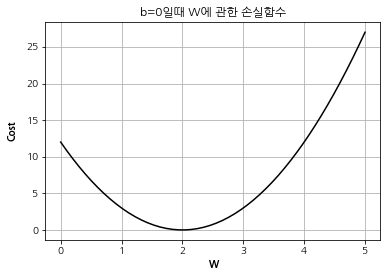

In [ ]:
x = np.arange(0, 5)   
y = 2*x
def cost_func(theta1):
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta1))**2, axis=1)/2

def hypothesis(x, theta1):
    return theta1*x

theta1_grid = np.linspace(0,5,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])
plt.xlabel('W',fontdict={'weight': 'bold'})
plt.ylabel('Cost', labelpad=10, fontdict={'weight': 'bold'})
plt.grid(True)

plt.plot(theta1_grid, J_grid, 'k')
plt.title('b=0일때 W에 관한 손실함수')
plt.savefig('loss.jpg', dpi=600)
plt.show()

In [ ]:
#files.download('loss.jpg') 

위의 함수를 보면, 손실을 최소화 시키는 $W$값이 2임을 알 수 있다. 이를 이용해 다시 $b$에 대한 손실함수를 그려보면

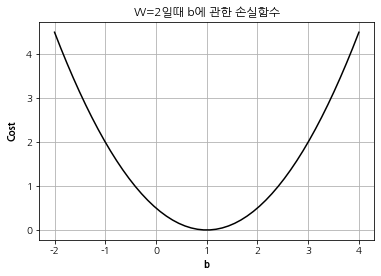

In [ ]:
y = 2*x + 1
def cost_func(b):
    b = np.atleast_2d(np.asarray(b))
    return np.average((y-hypothesis(x, b))**2, axis=1)/2

def hypothesis(x, b):
    return 2*x+b

b = np.linspace(-2,4,50)
J_grid = cost_func(b[:,np.newaxis])
plt.xlabel('b',fontdict={'weight': 'bold'})
plt.ylabel('Cost', labelpad=10, fontdict={'weight': 'bold'})
plt.grid(True)

plt.plot(b, J_grid, 'k')
plt.title('W=2일때 b에 관한 손실함수')
plt.savefig('loss2.jpg', dpi=600)
plt.show()

In [ ]:
#files.download('loss2.jpg') 

같은 원리로 b=1임을 알 수 있다.

##2.경사하강

그러나 위의 방법과 같이 그래프를 그려서 눈으로 확인하는 방법은 비효율적이다. 만일 손실함수가 이차함수가 아닌 100차, 2000차와 같이 $n$차 함수의 꼴을 가진다면, 최솟값을 찾기 위해 도대체 어디까지 $x$축의 범위를 잡고 그려야하는지 알 수 없으며 설령 그린다 한들 눈으로 찾는 것은 거의 불가능하기 때문이다. 

그렇기에 필요한 것이 미분이다. $W$와 $b$에 대해서 각각 미분을 통해 기울기가 0이 되는 지점을 찾는 것이다. 이를 식으로 전개하면,


> ${1 \over m}\sum_{i=1}^m(Wx_i+b-y_i)^2 = {1 \over m}\sum_{i=1}^m(W^2x_i^2+b^2+y_i^2+2Wx_ib-2Wx_iy_i-2by_i)$

로 나타낼 수 있다. 이제 해당 식을 $W$와 $b$에 대해 미분하면 되는 것인데, 다변수 함수이므로 편미분을 해주어야한다.

> ($W$의 기울기) $= {\partial Cost(W,b) \over ∂W} = {1 \over m}\sum_{i=1}^m(2x_i^2W+2x_ib-2x_iy_i)$

> ($b$의 기울기) $= {\partial Cost(W,b) \over ∂b} = {1 \over m}\sum_{i=1}^m(2b+2Wx_i-2y_i)$





이제 기울기가 계산된 뒤에는 미분 계수가 0이 되는 점을 찾아주어야한다. 개념 설명에서 말한 것과 같이 가설 초기화를 한 가정함수의 미분 계수가 양수라면 음의 방향으로 $x$를 옮기면 되고, 기울기가 음수라면 양의 방향으로 $x$를 옮기는 작업을 해주어야한다. 그리고 이는 공식으로 다음과 같이 표현된다.

>$x_{i+1} = x_i -$ (이동거리)$×$(기울기의 부호)

기울기의 부호 정도는 전혀 복잡한 계산이 아니므로 바로 구해줄 수 있으며, 우리가 위에서 구한 $W$와 $b$의 기울기가 이동거리를 계산하기 위해 사용된다. 미분 계수는 극소값에 가까워질수록 값이 작아진다는 점을 통해 **미분 계수와 비례하는 값**으로 이동거리를 정의한다. 이를 통해 극소값에서 멀 때는 많이 이동하고, 극소값에 가까울 때는 조금씩 이동할 수 있게 되는 것이다.

> $W ≔ W - α{\partial Cost(W,b) \over ∂W}$

>  $b ≔ b - α{\partial Cost(W,b) \over ∂b}$

이러한 계산의 반복을 통해 지속적인 **업데이트**로 최솟값을 찾게 되는 것이다. 업데이트 과정은 일반적으로 1000번 이상 정도로 많이 수행되는데, 이러한 업데이트의 횟수 에포크(epoch)라고 한다.

###Step size - $α$ (학습률)

Step size는 경사하강법에서 이동거리를 정의하기 위해 사용되는 **hyperparameter**이다. Hyperparameter인만큼 매우 중요하게 작용되는데, step size가 너무 큰 경우 이동 거리가 커지므로 빠르게 수렴할 수 있다는 장점이 있지만, 최소값으로 수렴되지 못 하고 함수값이 발산할 수 있다. 한편, step size가 너무 작으면 발산하지는 않겠지만, 최소값을 찾는데 너무 오래 걸릴 여지가 있다. 이 때문에 step size는 적절하게 선택해 주어야한다.


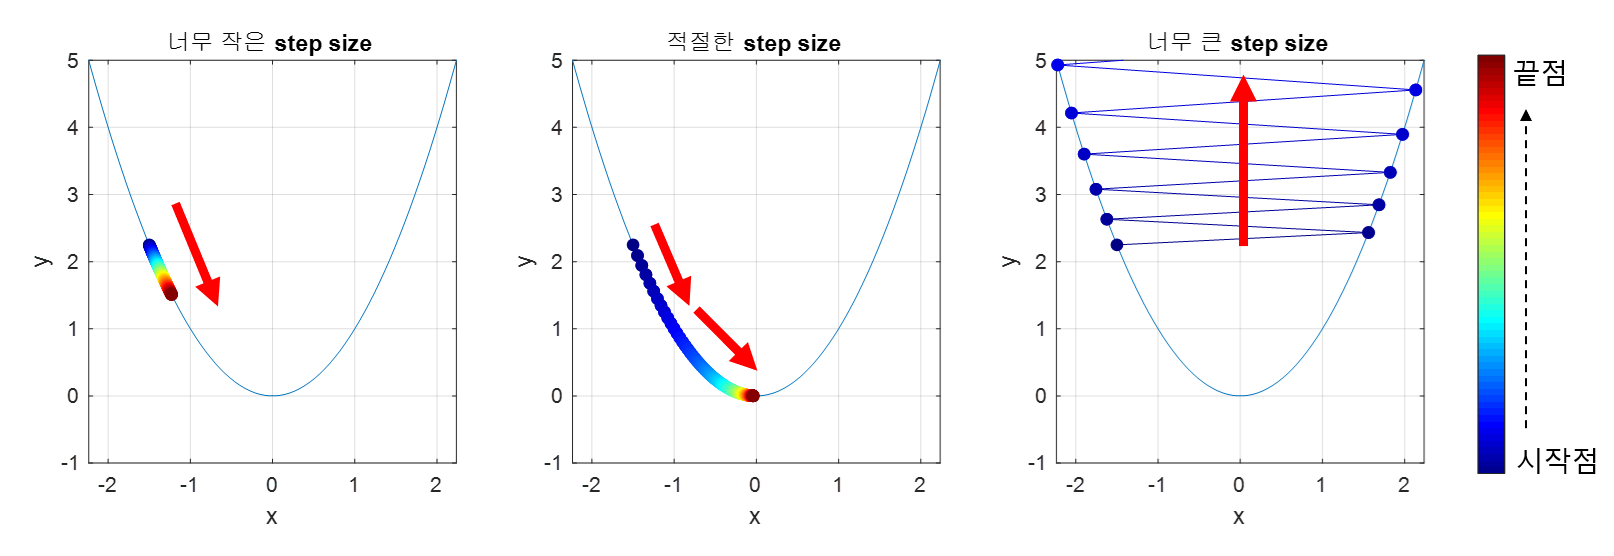

#<결과>

--------------------------------------------------


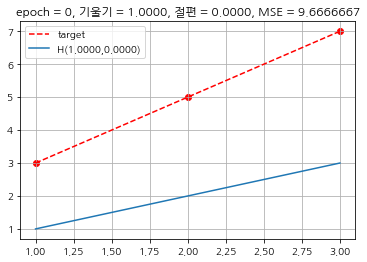

--------------------------------------------------
99


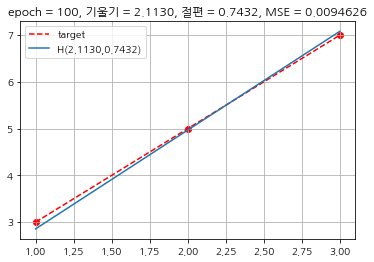

--------------------------------------------------
199


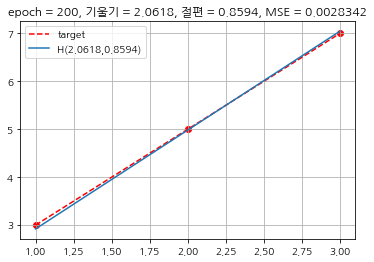

--------------------------------------------------
299


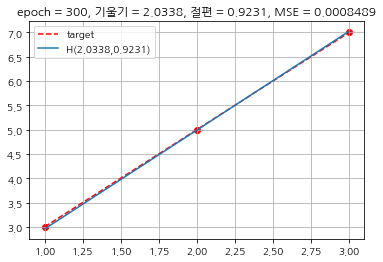

--------------------------------------------------
399


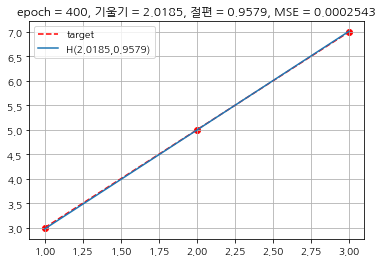

--------------------------------------------------
499


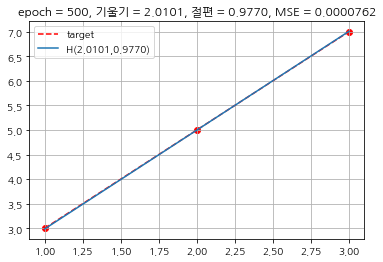

--------------------------------------------------
599


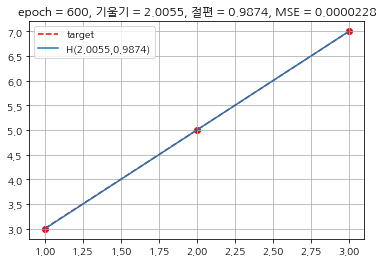

--------------------------------------------------
699


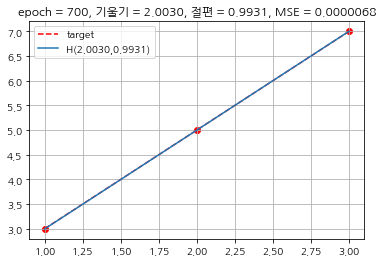

--------------------------------------------------
799


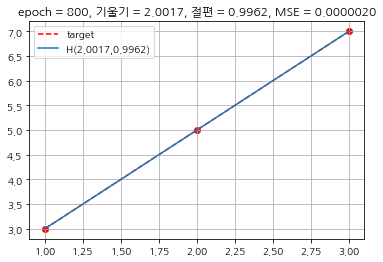

--------------------------------------------------
899


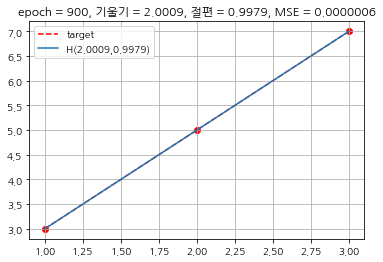

--------------------------------------------------
999


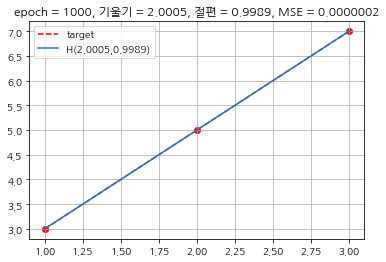

--------------------------------------------------


In [ ]:
x_data = np.array([1,2,3])
y_data = np.array([3,5,7])
 
W = 1 # 기울기 W를 1로 초기화
b = 0 # y절편 b를 0으로 초기화
 
lr = 0.05 # 학습률 설정 (learning rate)

def target_function():
    x = np.arange(1, 4)
    y = 2*x + 1  
    plt.plot(x, y, label='target', color='r', linestyle="--")
    plt.legend()

def MSE():
    return np.square(np.subtract(y_data,W*x_data+b)).mean() 

epochs = 1000 # 에포크 횟수 설정
reset_y = W*x_data+b
error = y_data - reset_y

print("-"*50)

target_function()
plt.scatter(x_data, y_data, color='r')
plt.title("epoch = %.f, 기울기 = %.04f, 절편 = %.04f, MSE = %.07f" % (0, W, b, MSE()))
plt.plot(x_data, reset_y, label='H(%.04f,%.04f)'% (W, b))
plt.legend()
plt.grid(True)
plt.savefig('Final High resoltion0.jpg', dpi=600)
plt.show()

print("-"*50)

pred_W=[]

# 경사 하강법 시작
for i in range(epochs):
    y_pred = W * x_data + b # y 예측값을 구하는 식
    error = y_data - y_pred # 오차 error = y 값 - y 예측 
 
    W_diff = -(1 / len(x_data)) * sum(x_data * (error)) # 평균 제곱 오차를 W로 미분한 값
    b_diff = -(1 / len(x_data)) * sum(y_data - y_pred) # 평균 제곱 오차를 b로 미분한 값
 
    W = W - lr * W_diff # 학습률 * 미분 결과 후 기존 W값 업데이트
    b = b - lr * b_diff # 학습률 * 미분 결과 후 기존 b값 업데이트
 
    if (i+1) % 100 == 0: # epoch가 100번 반복될 때마다 아래의 내용을 출력
        target_function()
        plt.scatter(x_data, y_data, color='r') # 이하 그래프 출력
        plt.title("epoch = %.f, 기울기 = %.04f, 절편 = %.04f, MSE = %.07f" % (i+1, W, b, MSE()))
        plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)], label='H(%.04f,%.04f)'% (W, b))
        plt.legend()
        plt.grid(True)
        print(i)
        globals()["Final High resoltion{}.jpg".format(i)] = plt.savefig("Final High resoltion{}.jpg".format(i),dpi=600)
        plt.show()
        pred_W.append(W)

        print("-"*50)

In [ ]:
files.download('Final High resoltion0.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
for i in range(1,11):
    files.download('Final High resoltion{}.jpg'.format(i*100-1)) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3] 
y = [3, 5, 7]

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 확률적 경사 하강법을 의미. 학습률(learning rate, lr)은 0.05.
sgd = optimizers.SGD(learning_rate=0.05)

# 손실 함수(Loss function)은 평균제곱오차 mse
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 에포크 1000
model.fit(x, y, epochs=1000, verbose=0)

plt.plot(x, model.predict(x), 'b', x, y, 'k.')
plt.grid(True)
plt.title("Tensorflow를 이용한 선형회귀분석")
plt.savefig('Final High resoltion1.jpg', dpi=600)
plt.show()

NameError: ignored

In [ ]:
files.download('Final High resoltion1.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>